In [1]:
import lightkurve as lk
from lightkurve import search_targetpixelfile

In [27]:
import matplotlib.pyplot as plt
import astropy.units as units
import numpy as np

In [3]:
import exoplanet as xo

In [31]:
# import batman
# import emcee
# import pylightcurve

    Done!
    Done!
    Done!
Checking exotethys database...
    Done!
    Done!
Checking ephemerides database...
    Done!
    Done!
Checking photometry database...
    Done!
    Done!
Checking catalogues database...


In [4]:
search_result = lk.search_lightcurve('TIC 147977348', mission='TESS')

In [5]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector,2018,DIAMANTE,1800,147977348,0.0
1,TESS Sector 06,2018,TESS-SPOC,1800,147977348,0.0
2,TESS Sector 06,2018,QLP,1800,147977348,0.0
3,TESS Sector 07,2019,TESS-SPOC,1800,147977348,0.0
4,TESS Sector 07,2019,QLP,1800,147977348,0.0
5,TESS Sector 33,2020,SPOC,120,147977348,0.0
6,TESS Sector 33,2020,TESS-SPOC,600,147977348,0.0
7,TESS Sector 33,2020,QLP,600,147977348,0.0
8,TESS Sector 34,2021,SPOC,120,147977348,0.0


In [6]:
idx = np.array([1,3])
tlc_collection = search_result[idx].download_all()

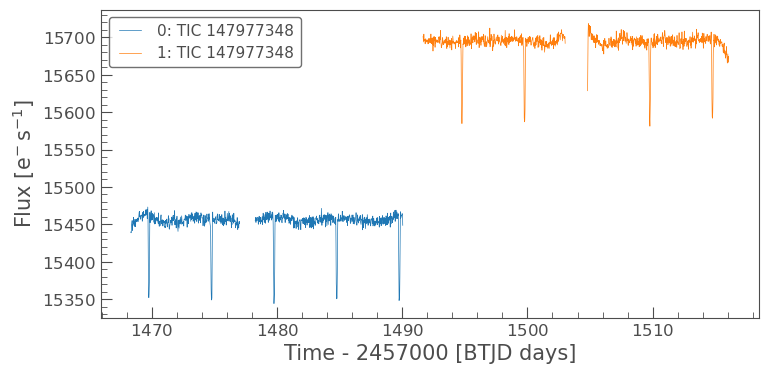

In [7]:
tlc_collection.plot();
plt.show()
plt.close()

In [8]:
tlc_stitched = tlc_collection.stitch()

In [9]:
tlc_stitched

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1468.305308706625,9.9894822e-01,2.7102386e-04,2.6993293e-03,11560,1057.22161,1096.30089,1.5127622e+04,3.7949116e+00,1.6302839e+03,1.1942365e+00,1.5439854e+04,4.1889749e+00,0,nan,nan,nan,nan,1057.22161,2.2247473e-04,1096.30089,2.2133399e-04,2.1922721e-02,1.5451468e-02
1468.3261424713899,9.9887604e-01,2.7104831e-04,2.6997693e-03,11561,1057.22185,1096.30072,1.5127378e+04,3.7952540e+00,1.6288796e+03,1.1949539e+00,1.5438739e+04,4.1893530e+00,0,nan,nan,nan,nan,1057.22185,2.2255199e-04,1096.30072,2.2134134e-04,2.2410767e-02,1.4912930e-02
1468.3469762359211,9.9899423e-01,2.7108629e-04,2.7002092e-03,11562,1057.22178,1096.30175,1.5126682e+04,3.7957857e+00,1.6272247e+03,1.1944782e+00,1.5440566e+04,4.1899400e+00,0,nan,nan,nan,nan,1057.22178,2.2264346e-04,1096.30175,2.2147466e-04,2.2035260e-02,1.6207390e-02
1468.3678099995216,9.9951124e-01,2.7115102e-04,2.7006480e-03,11563,1057.22288,1096.30114,1.5135289e+04,3.7966919e+00,1.6271213e+03,1.1948504e+00,1.5448557e+04,4.1909404e+00,0,nan,nan,nan,nan,1057.22288,2.2255316e-04,1096.30114,2.2138325e-04,2.3413876e-02,1.5729334e-02
1468.409477525093,9.9993664e-01,2.7102279e-04,2.7015242e-03,11565,1057.22250,1096.30208,1.5129262e+04,3.7948964e+00,1.6308970e+03,1.1941115e+00,1.5455132e+04,4.1889582e+00,0,nan,nan,nan,nan,1057.22250,2.2242086e-04,1096.30208,2.2158545e-04,2.3001254e-02,1.6477523e-02
1468.4303112868315,9.9907660e-01,2.7097468e-04,2.7019612e-03,11566,1057.22177,1096.30199,1.5123011e+04,3.7942228e+00,1.6303923e+03,1.1943535e+00,1.5441839e+04,4.1882148e+00,0,nan,nan,nan,nan,1057.22177,2.2253755e-04,1096.30199,2.2135170e-04,2.2243485e-02,1.6574031e-02
1468.451145048103,9.9951231e-01,2.7112808e-04,2.7023978e-03,11567,1057.22276,1096.30149,1.5129257e+04,3.7963705e+00,1.6279382e+03,1.1954371e+00,1.5448573e+04,4.1905856e+00,0,nan,nan,nan,nan,1057.22276,2.2260078e-04,1096.30149,2.2147772e-04,2.3003465e-02,1.6141118e-02
1468.471978808676,9.9956495e-01,2.7105879e-04,2.7028336e-03,11568,1057.22220,1096.30208,1.5125803e+04,3.7954006e+00,1.6291112e+03,1.1956854e+00,1.5449387e+04,4.1895146e+00,0,nan,nan,nan,nan,1057.22220,2.2264739e-04,1096.30208,2.2151023e-04,2.2061531e-02,1.6150715e-02


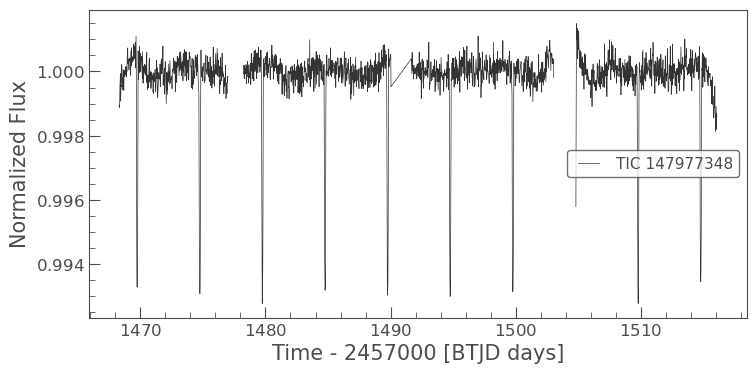

In [10]:
tlc_stitched.plot();
plt.show()
plt.close()

In [11]:
flat_lc = tlc_stitched.flatten(window_length=1001)

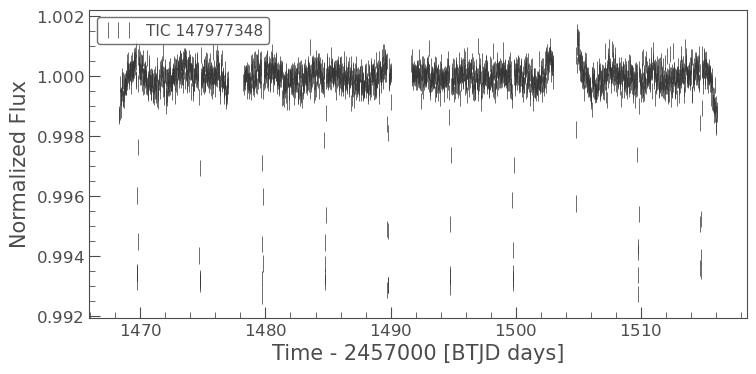

In [12]:
flat_lc.errorbar();
plt.show()
plt.close()

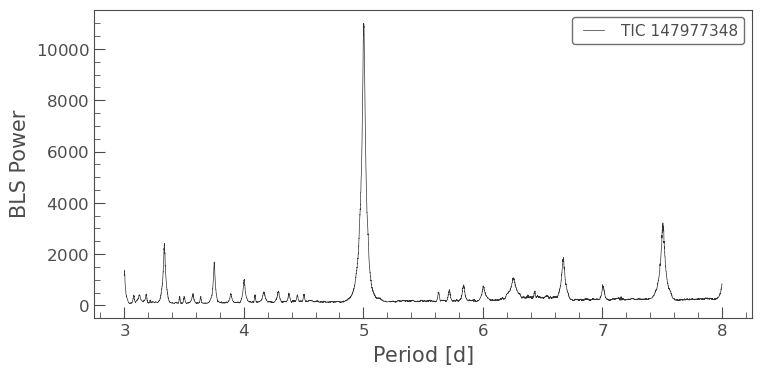

In [13]:
# Create array of periods to search
period = np.linspace(3, 8, 10000)
# Create a BLSPeriodogram
bls = flat_lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();
plt.show()
plt.close()

In [14]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

planet_b_period

<Quantity 5.00270027 d>

In [68]:
planet_b_dur

<Quantity 0.1 d>

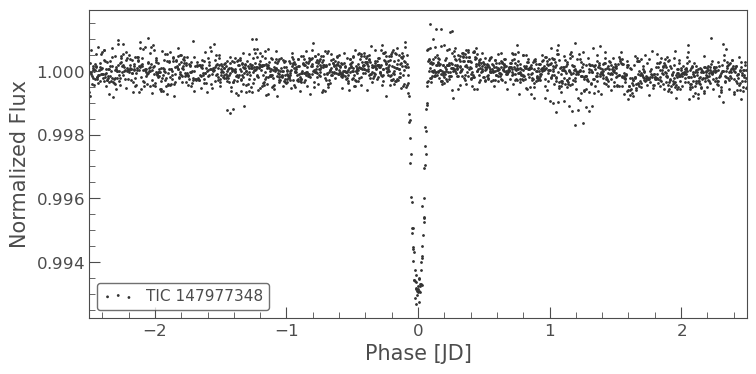

In [15]:
ax = flat_lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-2.5,2.5);
plt.show()
plt.close()

In [16]:
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

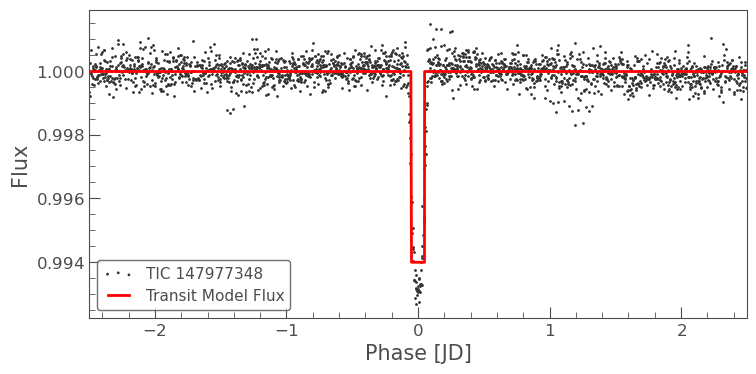

In [25]:
fold_lc = flat_lc.fold(planet_b_period, planet_b_t0)
ax = fold_lc.scatter();
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-2.5, 2.5);
plt.show()
plt.close()

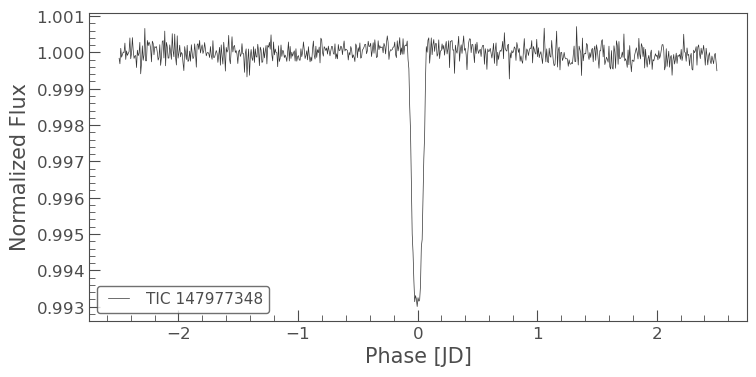

In [29]:
binned_lc = fold_lc.bin(time_bin_size=10*units.minute)
binned_lc.plot()
plt.show()
plt.close()

In [66]:
tlc_stitched

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1468.305308706625,9.9894822e-01,2.7102386e-04,2.6993293e-03,11560,1057.22161,1096.30089,1.5127622e+04,3.7949116e+00,1.6302839e+03,1.1942365e+00,1.5439854e+04,4.1889749e+00,0,nan,nan,nan,nan,1057.22161,2.2247473e-04,1096.30089,2.2133399e-04,2.1922721e-02,1.5451468e-02
1468.3261424713899,9.9887604e-01,2.7104831e-04,2.6997693e-03,11561,1057.22185,1096.30072,1.5127378e+04,3.7952540e+00,1.6288796e+03,1.1949539e+00,1.5438739e+04,4.1893530e+00,0,nan,nan,nan,nan,1057.22185,2.2255199e-04,1096.30072,2.2134134e-04,2.2410767e-02,1.4912930e-02
1468.3469762359211,9.9899423e-01,2.7108629e-04,2.7002092e-03,11562,1057.22178,1096.30175,1.5126682e+04,3.7957857e+00,1.6272247e+03,1.1944782e+00,1.5440566e+04,4.1899400e+00,0,nan,nan,nan,nan,1057.22178,2.2264346e-04,1096.30175,2.2147466e-04,2.2035260e-02,1.6207390e-02
1468.3678099995216,9.9951124e-01,2.7115102e-04,2.7006480e-03,11563,1057.22288,1096.30114,1.5135289e+04,3.7966919e+00,1.6271213e+03,1.1948504e+00,1.5448557e+04,4.1909404e+00,0,nan,nan,nan,nan,1057.22288,2.2255316e-04,1096.30114,2.2138325e-04,2.3413876e-02,1.5729334e-02
1468.409477525093,9.9993664e-01,2.7102279e-04,2.7015242e-03,11565,1057.22250,1096.30208,1.5129262e+04,3.7948964e+00,1.6308970e+03,1.1941115e+00,1.5455132e+04,4.1889582e+00,0,nan,nan,nan,nan,1057.22250,2.2242086e-04,1096.30208,2.2158545e-04,2.3001254e-02,1.6477523e-02
1468.4303112868315,9.9907660e-01,2.7097468e-04,2.7019612e-03,11566,1057.22177,1096.30199,1.5123011e+04,3.7942228e+00,1.6303923e+03,1.1943535e+00,1.5441839e+04,4.1882148e+00,0,nan,nan,nan,nan,1057.22177,2.2253755e-04,1096.30199,2.2135170e-04,2.2243485e-02,1.6574031e-02
1468.451145048103,9.9951231e-01,2.7112808e-04,2.7023978e-03,11567,1057.22276,1096.30149,1.5129257e+04,3.7963705e+00,1.6279382e+03,1.1954371e+00,1.5448573e+04,4.1905856e+00,0,nan,nan,nan,nan,1057.22276,2.2260078e-04,1096.30149,2.2147772e-04,2.3003465e-02,1.6141118e-02
1468.471978808676,9.9956495e-01,2.7105879e-04,2.7028336e-03,11568,1057.22220,1096.30208,1.5125803e+04,3.7954006e+00,1.6291112e+03,1.1956854e+00,1.5449387e+04,4.1895146e+00,0,nan,nan,nan,nan,1057.22220,2.2264739e-04,1096.30208,2.2151023e-04,2.2061531e-02,1.6150715e-02


In [67]:
tlc_flux = np.array(tlc_stitched.flux)
tlc_time = np.array(tlc_stitched.time)
tlc_flux_err = np.array(tlc_stitched.flux_err)

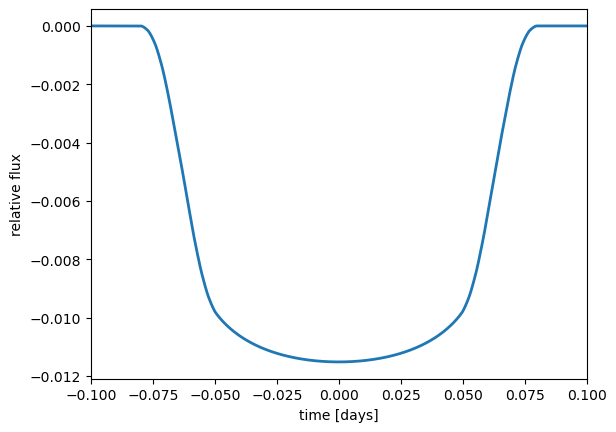

In [21]:
# The light curve calculation requires an orbit
orbit = xo.orbits.KeplerianOrbit(period=5.003)

# Compute a limb-darkened light curve using starry
t = np.linspace(-0.1, 0.1, 1000)
u = [0.3, 0.2]
light_curve = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.1, t=t, texp=0.02)
    .eval()
)
# Note: the `eval` is needed because this is using Theano in
# the background

plt.plot(t, light_curve, color="C0", lw=2)
plt.ylabel("relative flux")
plt.xlabel("time [days]")
_ = plt.xlim(t.min(), t.max())
plt.show()
plt.close()

In [22]:
np.random.seed(123)
periods = np.random.uniform(4, 6, 1)
t0s = periods * np.random.rand(1)
t = np.arange(0, 80, 0.02)
yerr = 5e-4

In [23]:
import pymc3 as pm

In [45]:
import pymc3_ext as pmx

In [47]:
with pm.Model() as model:

    # The baseline flux
    mean = pm.Normal("mean", mu=0.0, sd=1.0)

    # The time of a reference transit for each planet
    t0 = pm.Normal("t0", mu=t0s, sd=1.0, shape=2)

    # The log period; also tracking the period itself
    logP = pm.Normal("logP", mu=np.log(periods), sd=0.1, shape=2)
    period = pm.Deterministic("period", pm.math.exp(logP))

    # The Kipping (2013) parameterization for quadratic limb darkening paramters
    u = xo.distributions.QuadLimbDark("u", testval=np.array([0.3, 0.2]))

    r = pm.Uniform(
        "r", lower=0.01, upper=0.1, shape=2, testval=np.array([0.04, 0.06])
    )
    b = xo.distributions.ImpactParameter(
        "b", ror=r, shape=2, testval=np.random.rand(2)
    )

    # Set up a Keplerian orbit for the planets
    orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0, b=b)

    # Compute the model light curve using starry
    light_curves = xo.LimbDarkLightCurve(u).get_light_curve(
        orbit=orbit, r=r, t=t
    )
    light_curve = pm.math.sum(light_curves, axis=-1) + mean

    # Here we track the value of the model light curve for plotting
    # purposes
    pm.Deterministic("light_curves", light_curves)

    # ******************************************************************* #
    # On the folowing lines, we simulate the dataset that we will fit     #
    #                                                                     #
    # NOTE: if you are fitting real data, you shouldn't include this line #
    #       because you already have data!                                #
    # ******************************************************************* #
    y = pmx.eval_in_model(light_curve)
    y += yerr * np.random.randn(len(y))
    # ******************************************************************* #
    # End of fake data creation; you want to include the following lines  #
    # ******************************************************************* #

    # The likelihood function assuming known Gaussian uncertainty
    pm.Normal("obs", mu=light_curve, sd=yerr, observed=y)

    # Fit for the maximum a posteriori parameters given the simuated
    # dataset
    map_soln = pmx.optimize(start=model.test_point)

optimizing logp for variables: [b, r, u, logP, t0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 24726.500868720916 -> 24731.125949096957


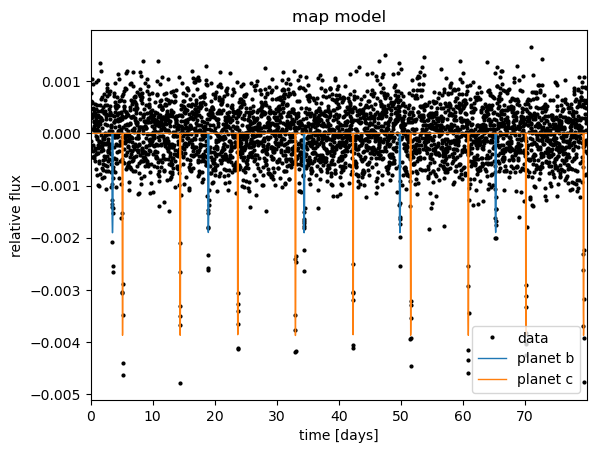

In [50]:
plt.plot(t, y, ".k", ms=4, label="data")
for i, l in enumerate("bc"):
    plt.plot(
        t, map_soln["light_curves"][:, i], lw=1, label="planet {0}".format(l)
    )
plt.xlim(t.min(), t.max())
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.legend(fontsize=10)
_ = plt.title("map model")
plt.show()
plt.close()

In [51]:
np.random.seed(42)
with model:
    trace = pm.sample(
        tune=3000,
        draws=3000,
        start=map_soln,
        cores=2,
        chains=2,
        init="adapt_full",
        target_accept=0.9,
    )

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # Remove the CWD from sys.path while we load stuff.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
/Users/katyaleidig/Library/Python/3.7/lib/python/site-packages/pymc3/step_methods/hmc/quadpotential.py:514: UserWarning: QuadPotentialFullAdapt is an experimental feature
  warnings.warn("QuadPotentialFullAdapt is an experimental feature")
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, r, u, logP, t0, mean]


Sampling 2 chains for 3_000 tune and 3_000 draw iterations (6_000 + 6_000 draws total) took 116 seconds.


In [53]:
pm.summary(trace, var_names=["period", "t0", "r", "b", "u", "mean"])


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/katyaleidig/Library/Python/3.7/lib/python/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
period[0],15.446,0.002,15.443,15.449,0.000,0.000,2406.0,1739.0,1.0
period[1],9.292,0.000,9.292,9.293,0.000,0.000,5219.0,4088.0,1.0
t0[0],3.504,0.004,3.497,3.510,0.000,0.000,3375.0,3519.0,1.0
t0[1],5.124,0.001,5.122,5.126,0.000,0.000,5280.0,3880.0,1.0
r[0],0.039,0.001,0.038,0.041,0.000,0.000,4599.0,3435.0,1.0
r[1],0.059,0.001,0.058,0.061,0.000,0.000,3711.0,3050.0,1.0
b[0],0.098,0.067,0.000,0.216,0.001,0.001,2760.0,1826.0,1.0
b[1],0.590,0.017,0.558,0.621,0.000,0.000,4245.0,2563.0,1.0
u[0],0.523,0.231,0.071,0.907,0.004,0.003,3697.0,2947.0,1.0
u[1],0.034,0.311,-0.459,0.607,0.005,0.004,3440.0,3012.0,1.0


In [55]:
import corner

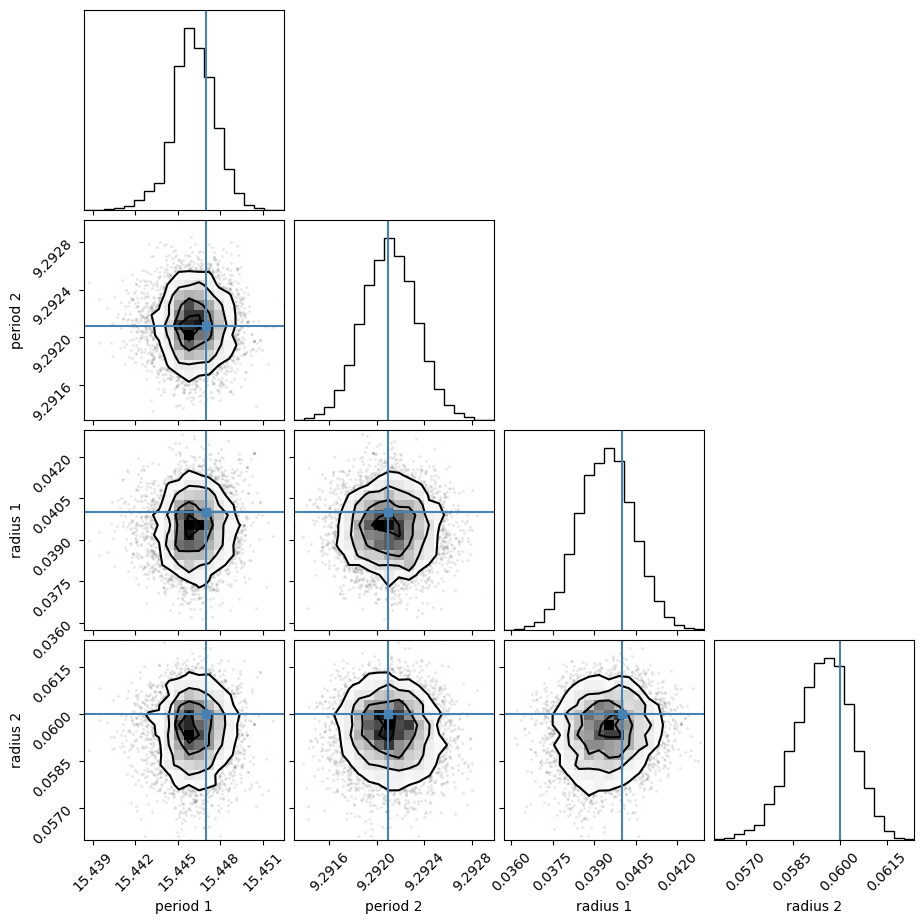

In [59]:
samples = pm.trace_to_dataframe(trace, varnames=["period", "r"])
truth = np.concatenate(
    pmx.eval_in_model([period, r], model.test_point, model=model)
)
_ = corner.corner(
    samples,
    truths=truth,
    labels=["period 1", "period 2", "radius 1", "radius 2"],
)
plt.show()
plt.close()

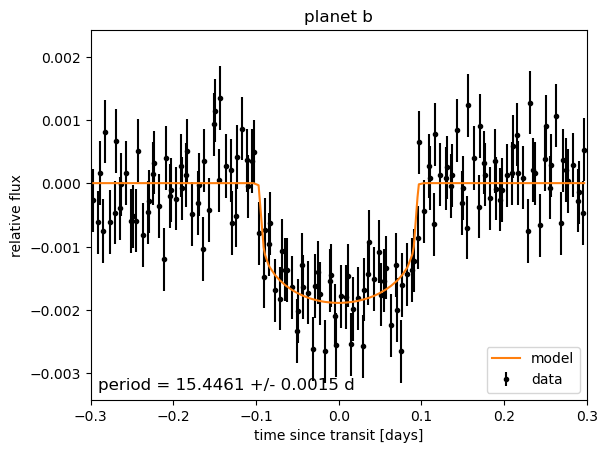

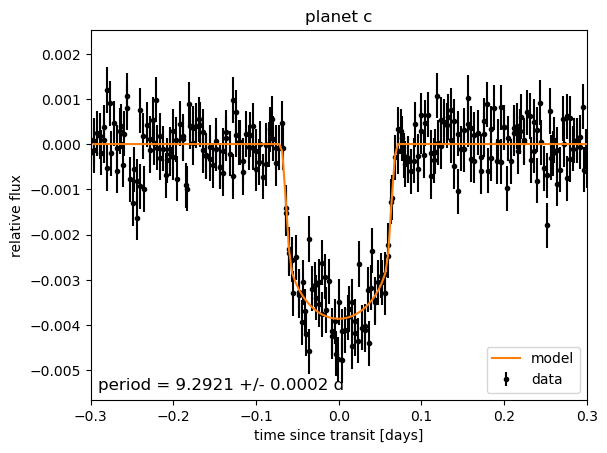

In [60]:
for n, letter in enumerate("bc"):
    plt.figure()

    # Get the posterior median orbital parameters
    p = np.median(trace["period"][:, n])
    t0 = np.median(trace["t0"][:, n])

    # Compute the median of posterior estimate of the contribution from
    # the other planet. Then we can remove this from the data to plot
    # just the planet we care about.
    other = np.median(trace["light_curves"][:, :, (n + 1) % 2], axis=0)

    # Plot the folded data
    x_fold = (t - t0 + 0.5 * p) % p - 0.5 * p
    plt.errorbar(
        x_fold, y - other, yerr=yerr, fmt=".k", label="data", zorder=-1000
    )

    # Plot the folded model
    inds = np.argsort(x_fold)
    inds = inds[np.abs(x_fold)[inds] < 0.3]
    pred = trace["light_curves"][:, inds, n] + trace["mean"][:, None]
    pred = np.median(pred, axis=0)
    plt.plot(x_fold[inds], pred, color="C1", label="model")

    # Annotate the plot with the planet's period
    txt = "period = {0:.4f} +/- {1:.4f} d".format(
        np.mean(trace["period"][:, n]), np.std(trace["period"][:, n])
    )
    plt.annotate(
        txt,
        (0, 0),
        xycoords="axes fraction",
        xytext=(5, 5),
        textcoords="offset points",
        ha="left",
        va="bottom",
        fontsize=12,
    )

    plt.legend(fontsize=10, loc=4)
    plt.xlim(-0.5 * p, 0.5 * p)
    plt.xlabel("time since transit [days]")
    plt.ylabel("relative flux")
    plt.title("planet {0}".format(letter))
    plt.xlim(-0.3, 0.3)
    
    plt.show()